<a href="https://colab.research.google.com/github/jcjimenezb123/PFM_PronosticoDemanda/blob/master/wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Load train data

In [2]:
data = pd.read_csv('train.csv')
data = data.drop('id',axis=1)
data

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      13.05        0.40  2.40              21.68      71.79           2.33   
1      13.01        3.66  2.21              16.53      98.87           2.46   
2      13.13        1.14  2.32              18.75     108.51           2.63   
3      12.06        1.41  2.04              16.58      73.52           0.84   
4      12.35        1.14  1.91              19.52      77.65           2.09   
..       ...         ...   ...                ...        ...            ...   
529    13.34        1.48  2.59              21.93      86.55           2.49   
530    12.34        0.64  2.15              15.87     112.91           1.11   
531    10.84        0.92  2.02              14.80      84.33           2.42   
532    11.22        2.08  2.34              19.04      91.91           2.72   
533    12.57        0.97  2.44              13.82      89.27           2.44   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          1.87                  0.09             1.30         1.070000  1.13   
1          2.34                  0.28             1.49         3.690000  0.75   
2          2.26                  0.13             2.15         5.030000  0.86   
3         -0.36                  0.37             0.14         7.869999  0.37   
4          1.98                  0.27             1.03         4.620000  1.11   
..          ...                   ...              ...              ...   ...   
529        0.93                  0.50             2.19        11.350000  0.53   
530        0.61                  0.13             0.58         2.620000  0.61   
531        1.30                  0.05             0.80         1.030000  0.94   
532        2.50                  0.28             1.67         2.590000  0.73   
533        2.34                  0.20             1.15         3.930000  0.87   

     od280/od315_of_diluted_wines  proline  target  
0                            2.45    96.79       1  
1                            2.79   588.86       0  
2                            2.66   954.80       0  
3                            1.01   194.88       2  
4                            3.46   502.23       1  
..                            ...      ...     ...  
529                          1.66   565.98       2  
530                          0.84   429.62       2  
531                          2.28    43.57       1  
532                          3.19   534.87       1  
533                          2.21   989.25       0  

[534 rows x 14 columns]

In [3]:
fin_test_data = pd.read_csv('test.csv')
test_data = fin_test_data.drop('id',axis=1)
test_data

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      11.73        3.16  2.02              16.35     102.81           0.98   
1      12.33       -0.06  1.47              13.12      73.68           1.41   
2      11.84        2.20  2.43              24.50      86.33           1.43   
3      13.03        3.31  1.99              17.22      83.23           2.15   
4      12.16        0.76  2.13              16.08      78.92           1.73   
..       ...         ...   ...                ...        ...            ...   
173    11.81        1.71  1.88              19.46      85.82           2.49   
174    13.57        0.81  2.21              12.90     115.47           2.29   
175    10.93        1.08  2.22              18.68      71.51           1.40   
176    12.95        1.34  2.06              15.01      95.92           2.31   
177    14.20        1.61  2.39              13.83      92.72           2.36   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          0.14                  0.21             0.77             6.72  0.50   
1          1.17                  0.13             0.97             2.60  0.99   
2         -0.17                  0.54             0.71             5.77  0.50   
3          2.21                  0.21             1.21             3.18  0.80   
4          0.15                  0.55             1.01             4.46  0.65   
..          ...                   ...              ...              ...   ...   
173        1.63                  0.37             1.41             2.03  0.94   
174        2.25                  0.18             1.83             3.77  0.86   
175        0.82                  0.37             0.85             0.77  0.80   
176        2.49                  0.26             1.29             3.36  1.15   
177        2.29                  0.27             1.85             4.72  0.97   

     od280/od315_of_diluted_wines  proline  
0                            1.54   652.43  
1                            1.87   120.42  
2                            1.20   644.68  
3                            2.66   885.76  
4                            1.21   515.87  
..                            ...      ...  
173                          2.43   411.07  
174                          3.35   810.75  
175                          2.13   404.58  
176                          2.59   974.11  
177                          3.42  1217.63  

[178 rows x 13 columns]

1    212
0    175
2    147
Name: target, dtype: int64


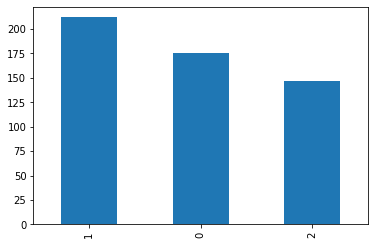

In [4]:
print(data.target.value_counts())
data.target.value_counts().plot(kind='bar')
plt.show()

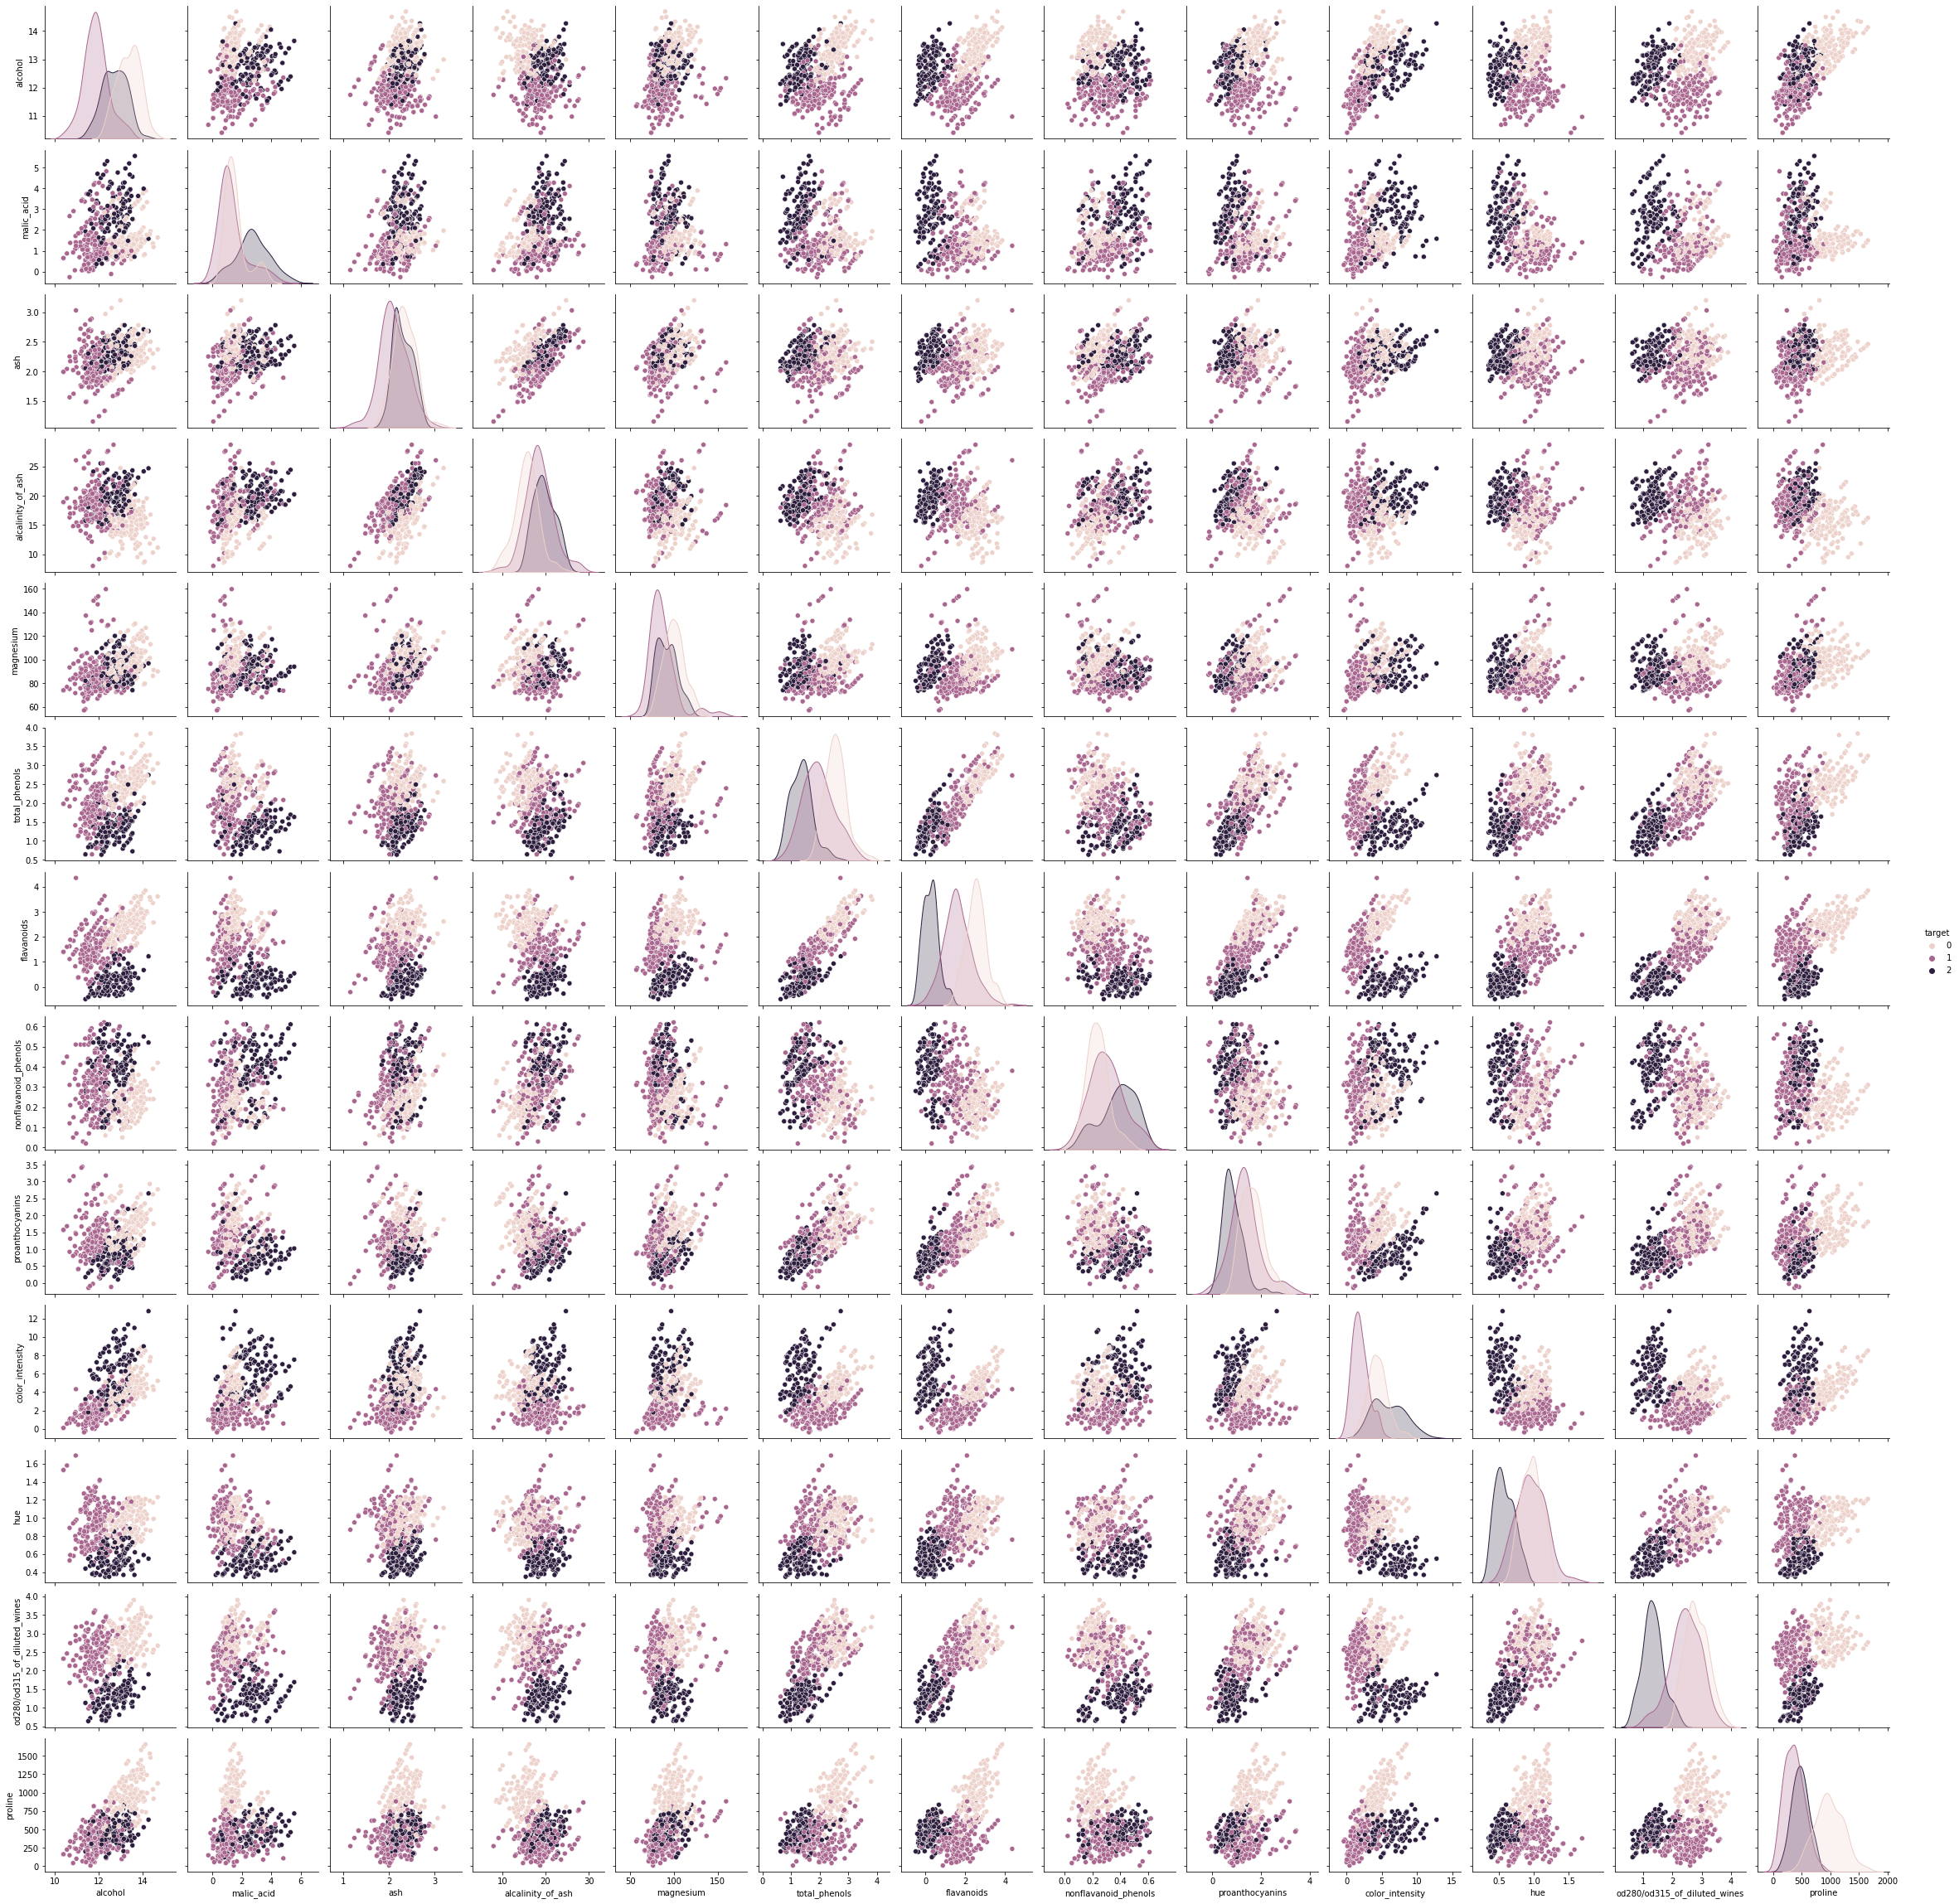

In [5]:
sns.pairplot(data,hue='target')
plt.show()

### Define traning data and test data

In [6]:
x = data.drop('target',axis=1)
y = data.target

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### Build MLP_model

In [9]:
# neural number → hidden layer 2 = 100，50
mlp = MLPClassifier(hidden_layer_sizes=(100,50),max_iter=500)
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)

In [10]:
predictions = mlp.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.98      1.00      0.99        51
           2       1.00      1.00      1.00        31

    accuracy                           0.99       134
   macro avg       0.99      0.99      0.99       134
weighted avg       0.99      0.99      0.99       134



In [11]:
print(confusion_matrix(y_test,predictions))

[[51  1  0]
 [ 0 51  0]
 [ 0  0 31]]


In [12]:
fin_test_data = pd.read_csv('test.csv')
test_data = fin_test_data.drop('id',axis=1)
test_data = scaler.fit_transform(test_data)

In [13]:
fin_predictions = mlp.predict(test_data)
fin_predictions

array([2, 1, 2, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1,
       1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 2, 2,
       0, 1, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0, 2, 2,
       2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 1, 1,
       0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1,
       0, 0])

In [14]:
sample_sub = pd.read_csv('sample_submit.csv')
sample_sub

id  target
0      0       0
1      1       0
2      2       0
3      3       0
4      4       0
..   ...     ...
173  173       0
174  174       0
175  175       0
176  176       0
177  177       0

[178 rows x 2 columns]

### Save the file and output to submission file

In [15]:
output = pd.DataFrame({'id':fin_test_data.id,'target':fin_predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


![image.png](attachment:image.png)